# Quantum Amplitude Damping Channel

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from qcd.dampingchannels import (OneShotDampingChannel,
                                 OneShotEntangledDampingChannel, 
                                 OneShotEntangledFullInputDampingChannel, 
                                 OneShotEntangledUniversalDampingChannel,
                                OneShotEntangledFullUniversalDampingChannel)
from qcd.configurations import OneShotSetupConfiguration
from qcd.backends import SimulatorBackend, FakeSimulatorBackend, DeviceIBMQ
from qcd.configurations import OneShotSetupConfiguration
from qcd.optimizationresults.globaloptimizationresults import GlobalOptimizationResults
from qcd.optimizationresults.globaloptimizationresults.global_aux import build_optimization_result
from qcd import save_object_to_disk, load_object_from_file
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Quantum Amplitude Damping Channel General Analysis

In [6]:
one_qubit_channel = OneShotDampingChannel(
    channel_setup_configuration = OneShotSetupConfiguration({
        'points_theta': 20,
        'points_phase': 10,
        'attenuation_angles': np.append(np.arange(0, np.pi/2, np.pi/2/20), np.pi/2)}))

In [6]:
one_qubit_results = one_qubit_channel.run(backend = SimulatorBackend())

Execution using channel with λ=0.0 launched to qasm_simulator with id=71caad87-5505-4f26-abd1-2f52d8dccdfd
Execution using channel with λ=0.5 launched to qasm_simulator with id=ef41fd2c-26f5-4076-b209-d44e1eda295e
Execution using channel with λ=1.0 launched to qasm_simulator with id=90ac58c7-e5a4-4e90-acbf-725c6537e1cf


In [8]:
save_object_to_disk(one_qubit_results, name='20210504_one_qubit_results', path='results/')

In [2]:
loaded_one_qubit_results = load_object_from_file(name='20210504_one_qubit_results', path='results/')

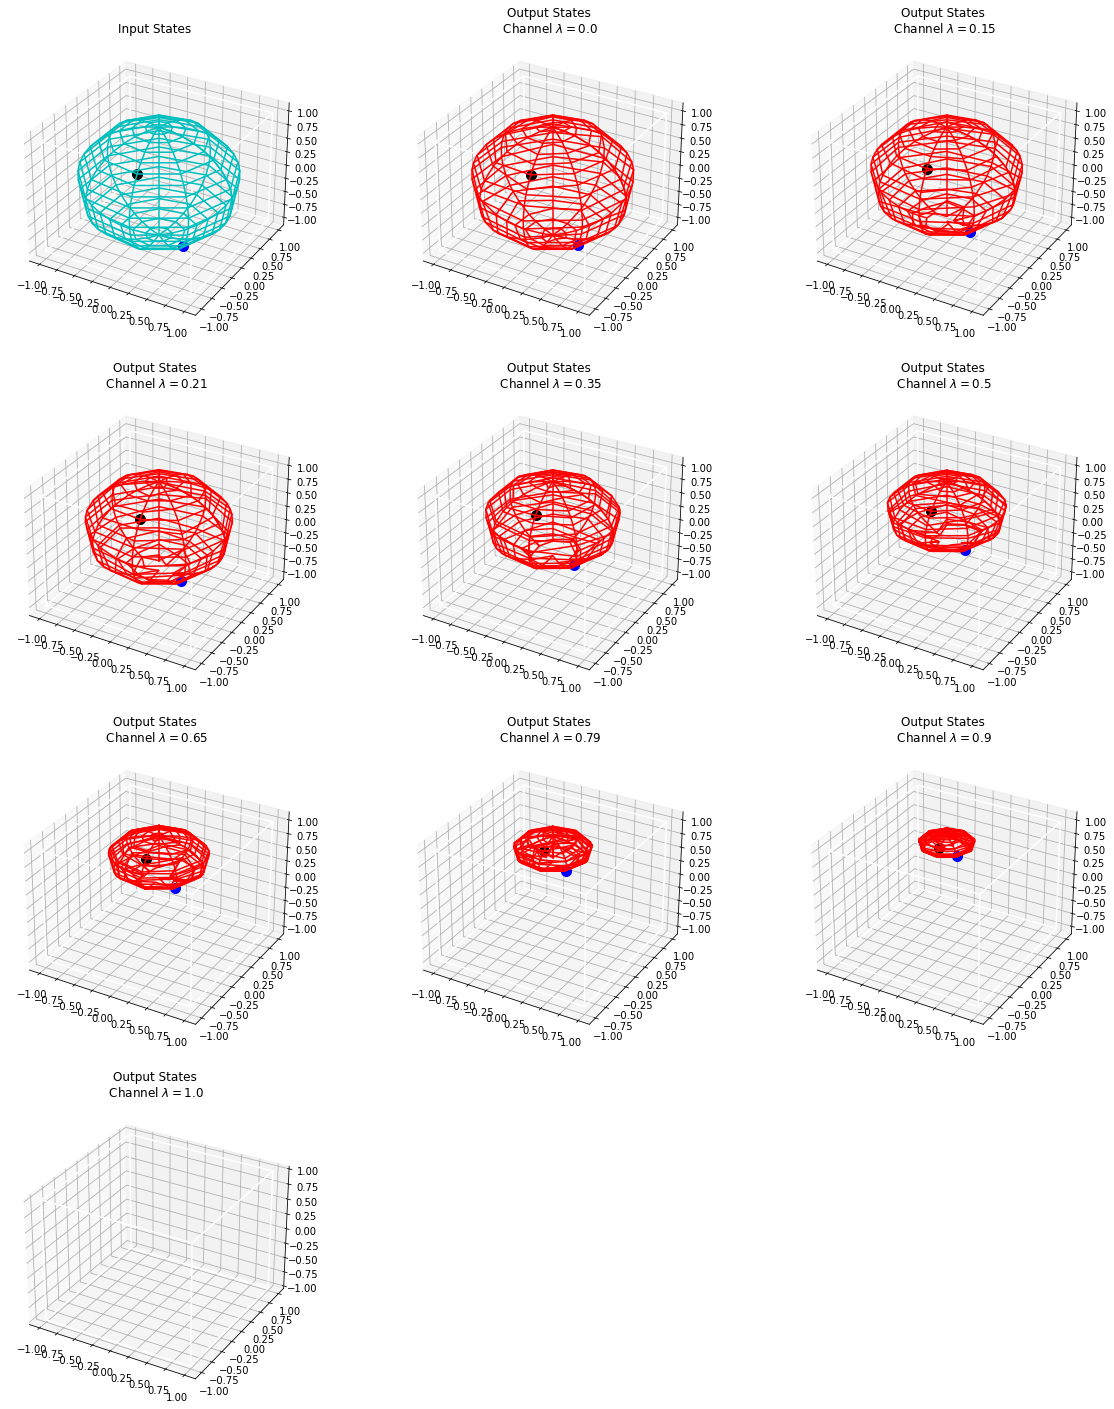

In [5]:
loaded_one_qubit_results.plot_wireframe_blochs(in_rows=4, in_cols=3, show_sample_states=True)

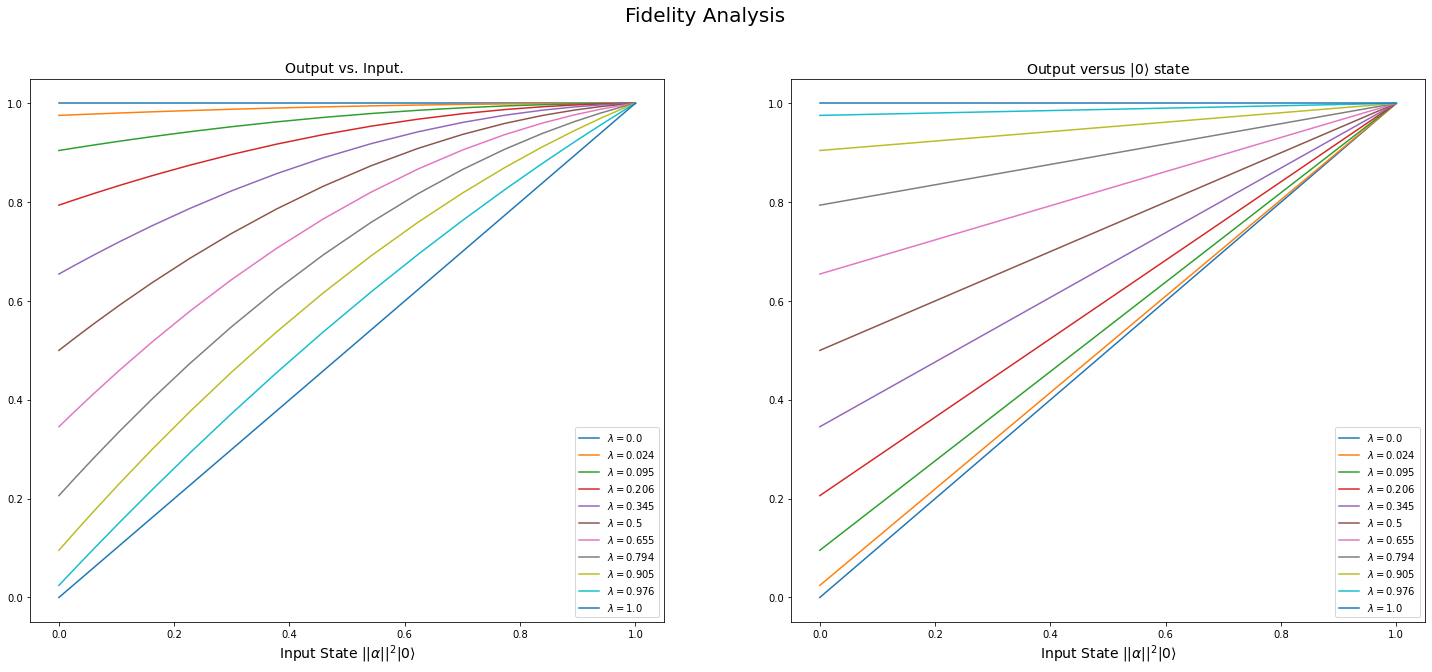

In [8]:
one_qubit_channel.plot_fidelity()

In [9]:
noisy_channel = OneShotDampingChannel(
    channel_setup_configuration = OneShotSetupConfiguration({ 
        'points_theta': 10,
        'points_phase': 7,
        'attenuation_angles': [np.pi/4]}))

In [13]:
noisy_results = noisy_channel.run(backend = [SimulatorBackend(), FakeSimulatorBackend(), DeviceIBMQ()])

Running on current least busy device:  ibmq_quito
Execution using channel with λ=0.5 launched to qasm_simulator with id=03b6c7b6-8f48-42b0-a98f-5dab66b619b3
Execution using channel with λ=0.5 launched to qasm_simulator(fake_athens) with id=1d4be8fa-0f0f-4956-b726-ebe55bc9d099
Execution using channel with λ=0.5 launched to ibmq_quito with id=6092406ee742b531c04ea576


In [14]:
save_object_to_disk(noisy_results, name='20210505_noisy_results', path='results/')

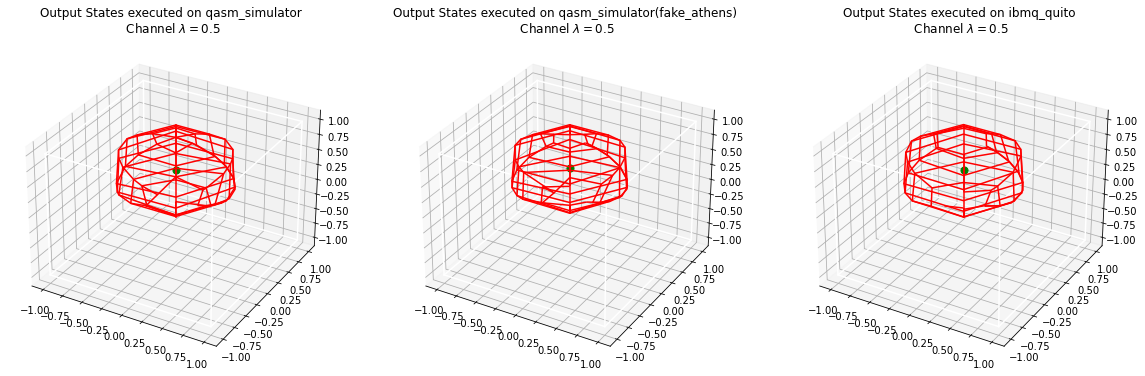

In [15]:
noisy_results.plot_wireframe_blochs_one_lambda()

## One-Shot Strategy: Discriminating 2 ADCs Implementation

### Discriminating 2 ADCs with one qubit as input

#### Circuit

In [19]:
one_qubit_channel = OneShotDampingChannel(
    channel_setup_configuration = OneShotSetupConfiguration({
        'points_theta': 20,
        'points_phase': 10,
        'attenuation_angles': np.append(np.arange(0, np.pi/2, np.pi/2/20), np.pi/2)}))

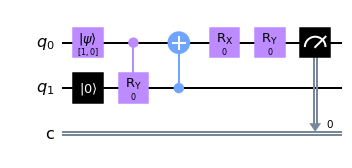

In [20]:
one_qubit_channel.plot_first_channel()

#### Optimization

In [16]:
optimization_setup = {'optimizer_algorithms': ['CRS'],
                      'optimizer_iterations': [1000],
                      'eta_partitions': 20,  # number of partitions for the eta ranging from 0 to pi/2
                      'number_channels_to_discriminate': 2,
                      'number_third_channels': 0,
                      'plays': 10000}

filename = '20210505a_C1_A1_1000_10000_2_0_20'

In [ ]:
results = OneShotDampingChannel.find_optimal_configurations(optimization_setup=optimization_setup)

In [ ]:
save_object_to_disk(results, name=filename, path="results/")

#### Validation

In [12]:
filename_one_qubit = '20210502b_C1_A1_1000_10000_2_0_20'
path_one_qubit = '../src/results/'

In [7]:
results_one_qubit = GlobalOptimizationResults.load_results(file_names=filename_one_qubit, path=path)

In [8]:
results_one_qubit.validate_optimal_configurations_one_qubit(plays=1000000)

number of eta groups to validate: 210
Going to validate this eta group: (4, 0)
Optimal Probability: 51.0% Validated Probability: 50.08 % Difference (absolute value): 0.93%
Group of etas # 0 of 210
total time taken so far: 0 minutes and 4 seconds
Going to validate this eta group: (9, 4)
Optimal Probability: 51.5% Validated Probability: 50.81 % Difference (absolute value): 0.69%
Group of etas # 20 of 210
total time taken so far: 1 minutes and 45 seconds
Going to validate this eta group: (18, 9)
Optimal Probability: 54.05% Validated Probability: 53.53 % Difference (absolute value): 0.52%
Group of etas # 40 of 210
total time taken so far: 3 minutes and 27 seconds
Going to validate this eta group: (31, 13)
Optimal Probability: 61.79% Validated Probability: 60.92 % Difference (absolute value): 0.87%
Group of etas # 60 of 210
total time taken so far: 5 minutes and 1 seconds
Going to validate this eta group: (49, 18)
Optimal Probability: 75.09% Validated Probability: 74.16 % Difference (absolu

In [13]:
save_object_to_disk(results_one_qubit, name='20210505a_C1_A1_1000_10000_2_0_20_validated_1000000', path=path_one_qubit)

#### Plot Results

In [14]:
validated_results = load_object_from_file(name='20210505a_C1_A1_1000_10000_2_0_20_validated_1000000', path=path_one_qubit)

##### Plot probabilities from simulation

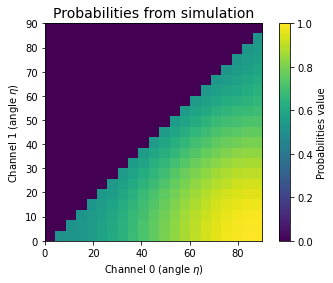

In [15]:
validated_results.plot_probabilities(results_index=0)

##### Plot probabilities from validation

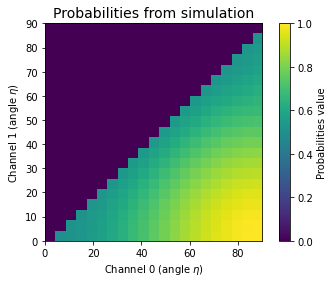

In [16]:
validated_results.plot_probabilities(results_index=1)

##### Compare probabilities between simulation and validation

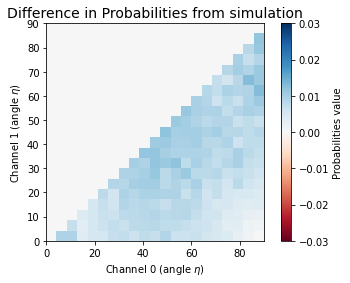

In [21]:
validated_results.plot_probabilities_comparison(results_index1=0,
                                                results_index2=1,
                                               vmin=-0.03,
                                               vmax=0.03)

##### Theoretical results from the paper

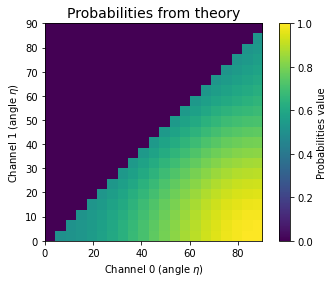

In [22]:
validated_results.plot_theoretical_probabilities(strategy='one_shot')

##### Compare probabilities from validated results with the theoretical ones from the paper
###### In Absolute Value 

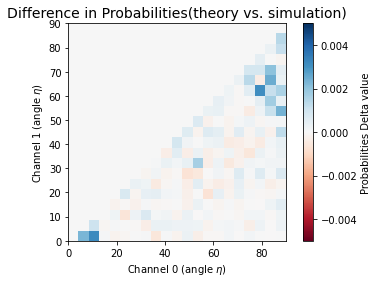

In [25]:
validated_results.plot_probabilities_comparison_with_theoretical_result(results_index=1,
                                                              strategy='one_shot',
                                                              vmin= -0.005,
                                                              vmax= 0.005)

###### In percentage

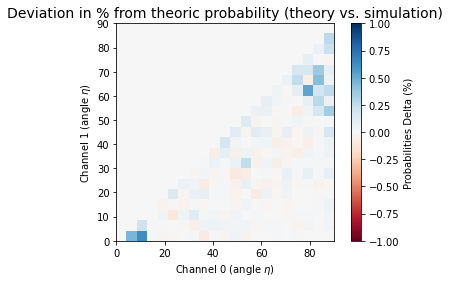

In [28]:
validated_results.plot_probabilities_comparison_percentage(results_index=1,
                                                 strategy='one_shot',
                                                 vmin= -1,
                                                 vmax= 1)

#### Input state obtained from simulation: Amplitude $|1>$

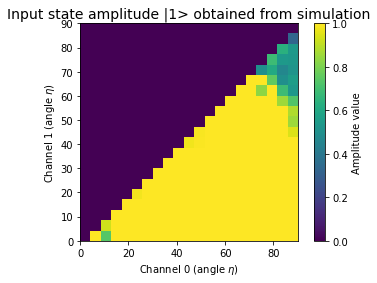

In [29]:
validated_results.plot_amplitudes(results_index=1)

#### Input state obtained from theory: Amplitude $|1>$

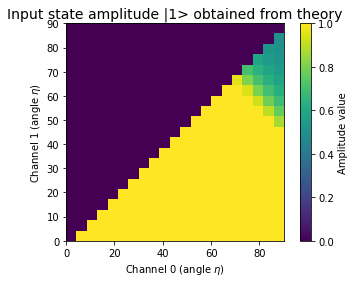

In [30]:
validated_results.plot_theoretical_amplitudes(strategy='one_shot')

#### Amplitude deltas when comparing simulation with the theory

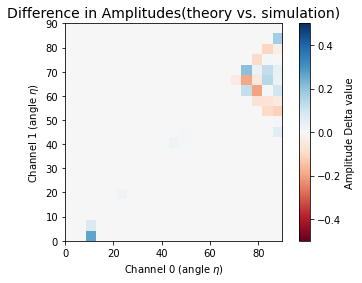

In [31]:
validated_results.plot_amplitudes_comparison_with_theoretical_result(results_index=1,
                                                            strategy='one_shot',
                                                            vmin = -0.5,
                                                            vmax = 0.5)

### Discriminating 2 ADCs with two entangled qubits as input

#### Circuit

In [21]:
two_qubit_channel = OneShotEntangledDampingChannel(
    channel_setup_configuration = OneShotSetupConfiguration({
        'points_theta': 20,
        'points_phase': 10,
        'attenuation_angles': np.append(np.arange(0, np.pi/2, np.pi/2/20), np.pi/2)}))

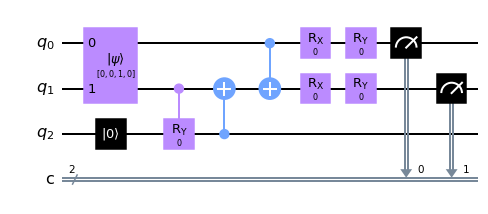

In [22]:
two_qubit_channel.plot_first_channel()

#### Optimization

In [23]:
optimization_setup_entangled = {'optimizer_algorithms': ['DIRECT_L'],
                              'optimizer_iterations': [1000],
                              'eta_partitions': 20,  # number of partitions for the eta ranging from 0 to pi/2
                              'number_channels_to_discriminate': 2,
                              'number_third_channels': 0,
                              'plays': 10000}

filename_entangled = '20210505a_C2_A2_1000_10000_2_0_20'

In [ ]:
results_entangled = OneShotEntangledDampingChannel.find_optimal_configurations(optimization_setup=optimization_setup_entangled)

In [ ]:
save_object_to_disk(results_entangled, name=filename_entangled, path="results/")

#### Validation

In [32]:
filename_two_qubit = '20210413a_C2_A2_500_10000'
path_two_qubit = '../src/results/'

In [33]:
results_two_qubit = GlobalOptimizationResults.load_results(file_names=filename_two_qubit, path=path_two_qubit)

In [ ]:
results_two_qubit.validate_optimal_configurations(plays=1000000)

In [ ]:
save_object_to_disk(results_one_qubit, name='20210505a_C1_A2_1000_10000_2_0_20_validated_1000000', path='results/')

#### Plot Results

In [37]:
validated_results_two_qubit = load_object_from_file(name='20210505a_C1_A2_1000_10000_2_0_20_validated_1000000', path=path_two_qubit)

##### Plot probabilities from simulation

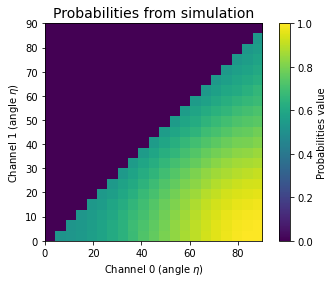

In [39]:
results_two_qubit.plot_probabilities(results_index=0)

##### Plot probabilities from validation

In [ ]:
validated_results_two_qubit.plot_probabilities(results_index=1)

##### Compare probabilities between simulation and validation

In [ ]:
validated_results_two_qubit.plot_probabilities_comparison(results_index1=0,
                                                results_index2=1,
                                               vmin=-0.03,
                                               vmax=0.03)

##### Theoretical results from the paper

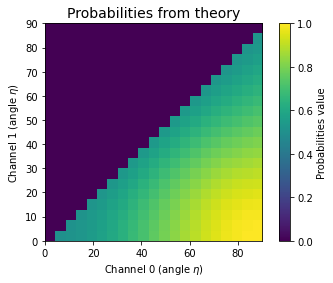

In [41]:
results_two_qubit.plot_theoretical_probabilities(strategy='one_shot_side_entanglement')

##### Compare probabilities from validated results with the theoretical ones from the paper
###### In Absolute Value 

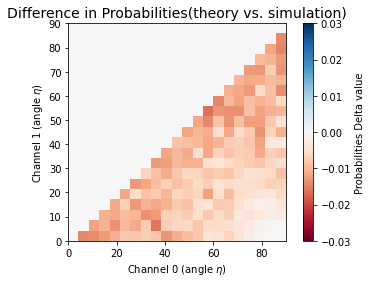

In [46]:
results_two_qubit.plot_probabilities_comparison_with_theoretical_result(results_index=0,
                                                              strategy='one_shot_side_entanglement',
                                                              vmin= -0.03,
                                                              vmax= 0.03)

###### In percentage

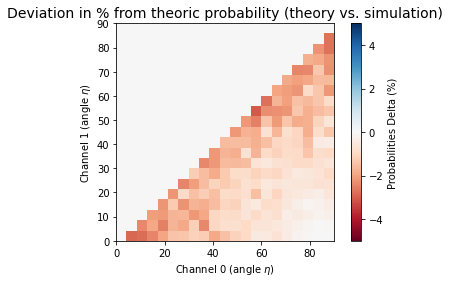

In [49]:
results_two_qubit.plot_probabilities_comparison_percentage(results_index=0,
                                                 strategy='one_shot_side_entanglement',
                                                 vmin= -5,
                                                 vmax= 5)

#### Input state obtained from simulation: Amplitude $|10>$

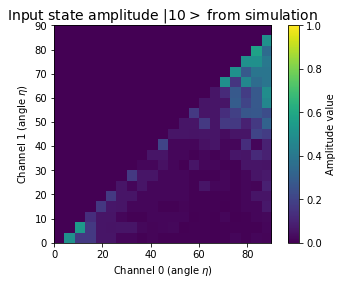

In [50]:
results_two_qubit.plot_amplitudes(results_index=0, title='Input state amplitude $|10>$ from simulation')

#### Input state obtained from theory: Amplitude $|10>$

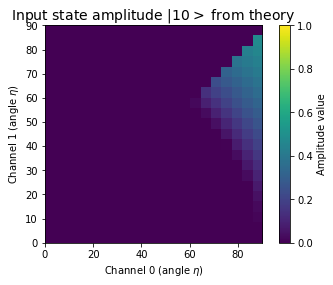

In [51]:
results_two_qubit.plot_theoretical_amplitudes(strategy='one_shot_side_entanglement', title='Input state amplitude $|10>$ from theory')

#### Amplitude deltas when comparing simulation with the theory

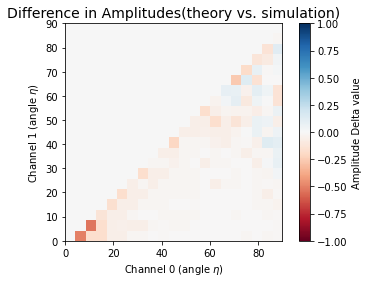

In [53]:
results_two_qubit.plot_amplitudes_comparison_with_theoretical_result(results_index=0,
                                                            strategy='one_shot_side_entanglement',
                                                            vmin = -1,
                                                            vmax = 1)

#### Comparing maximal theoretical probabilities between one qubit and two entangled qubit input

min: -2.220446049250313e-16, max 0.026917839007302935


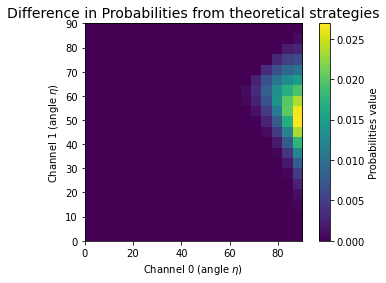

In [54]:
results_two_qubit.plot_theoretical_probabilities_comparison(first_strategy = 'one_shot_side_entanglement',
                                                  second_strategy= 'one_shot')

#### Difference between success probability computed at optimal $y$ and $y = 0$ vs $\eta_0$ and $\eta_1$

min: 0.0, max 0.0450848360846548


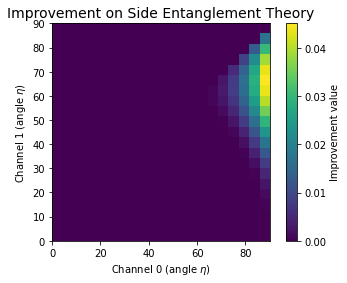

In [55]:
results_two_qubit.plot_theoretical_improvement(vmin =0,
                                     vmax = 0.05)

### Discriminating 3 ADCs with two entangled qubits as input

#### Universal Circuit

In [24]:
two_qubit_full_universal_channel = OneShotEntangledFullUniversalDampingChannel(
    channel_setup_configuration = OneShotSetupConfiguration({
        'points_theta': 20,
        'points_phase': 10,
        'attenuation_angles': np.append(np.arange(0, np.pi/2, np.pi/2/20), np.pi/2)}))

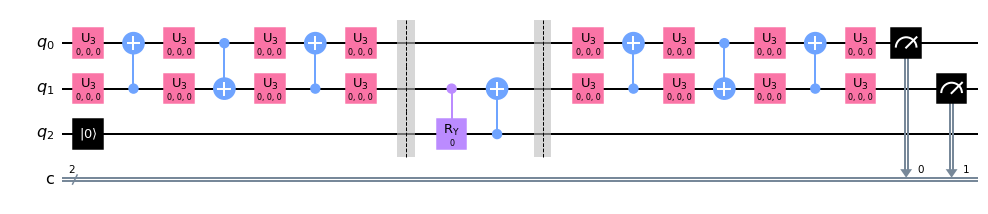

In [25]:
two_qubit_full_universal_channel.plot_first_channel()

#### Optimization

In [26]:
optimization_setup_universal = {'optimizer_algorithms': ['CRS'],
                          'optimizer_iterations': [1000],
                          'eta_partitions': 3,  # number of partitions for the eta ranging from 0 to pi/2
                          'number_channels_to_discriminate': 3,
                          'number_third_channels': 20,
                          'plays': 1000}

filename_universal = '20210505a_C2b_A1_1000_1000_3_6_20'

In [ ]:
results_universal = OneShotEntangledUniversalDampingChannel.find_optimal_configurations(optimization_setup=optimization_setup_universal)

In [ ]:
save_object_to_disk(results_universal, name=filename_universal, path="results/")